In [3]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 5.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.5 MB 4.9 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.5 MB 8.5 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.5 MB 7.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.5 MB 7.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.8/9.5 MB 7.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.5 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 5.1 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   --


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv(r'C:\Users\lenovo\Desktop\New folder\stores_sales_forecasting.csv', encoding='latin1'
                                                                                              '')

# Initial exploration
print(df.info())
print(df.head())

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

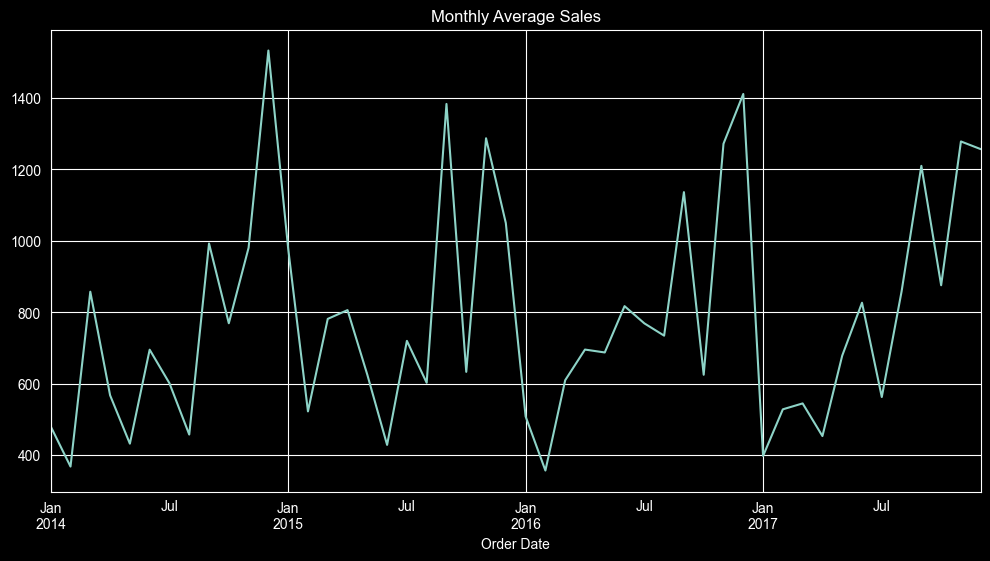

In [11]:
# Convert Order Date to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting relevant features and sorting
df = df[['Order Date', 'Sales']].sort_values('Order Date')

# Grouping sales by date (Daily aggregation)
df_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Setting 'Order Date' as the index
df_sales.set_index('Order Date', inplace=True)

# Resampling to Monthly frequency to reduce noise and identify trends
y = df_sales['Sales'].resample('MS').mean()

# Visualize the data
y.plot(figsize=(12, 6), title='Monthly Average Sales')
plt.show()

In [12]:
# Split the data (80% Training, 20% Testing)
train_size = int(len(y) * 0.8)
train, test = y[0:train_size], y[train_size:]

print(f"Total months: {len(y)}")
print(f"Training months: {len(train)}")
print(f"Testing months: {len(test)}")

Total months: 48
Training months: 38
Testing months: 10


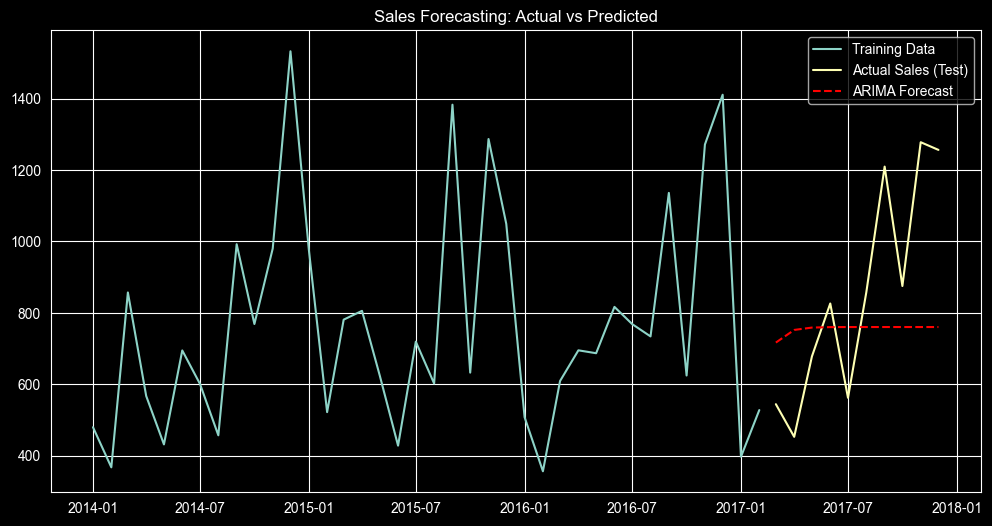

In [13]:
# Initialize and fit the ARIMA model
# p=1 (lag), d=1 (differencing for stationarity), q=1 (moving average)
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Sales (Test)')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('Sales Forecasting: Actual vs Predicted')
plt.legend()
plt.show()

In [14]:
# Calculate Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"Evaluation Metrics:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Evaluation Metrics:
Root Mean Squared Error (RMSE): 301.13
Mean Absolute Error (MAE): 249.04
